# 자동차 연비 분석, 회귀분석 모델 + 산점도 이용해 보기
### 자동차 연비 가져오기
### 공식사이트 : https://archive.ics.uci.edu/
### 검색어 :  auto MPG

In [1]:
# auto-mpg.csv

import numpy as np
import pandas as pd

data_df = pd.read_csv("./auto-mpg.csv", header = 0, engine = "python")
print(f"data_df의 크기 : {data_df.shape}")
data_df.head()

data_df의 크기 : (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,orgin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
# 특정 컬럼 제외하기 -> horsepower, orgin, car_name
data_df = data_df.drop(["horsepower", "orgin", "car_name" ], axis=1, inplace=False)
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [20]:
# 기본 컬럼 조사 info()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [21]:
# 선형회귀 모델을 활용해서 

# 선형(직선) 회귀분석을 이용해서 분석 모델을 구축
from sklearn.linear_model import LinearRegression
# 학습용, 테스트용의 데이터 분리해 주기
from sklearn.model_selection import train_test_split
# 분석 평가지수 MSE(오류의 제곱평균 : 낮을수록 좋다. 모델의 예측값이 실제값과 거의 비슷.)
# R^2 : 예측값 / 실제값 나눈 비율 : 클수록 좋다. 모델의 예측값이 실제값과거의 비슷
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# X,Y분할 독립변수, 종속변수를 나누는 작업
Y = data_df["mpg"]
# PRICE를 제외한 나머지 변수를 가지고 오기
# axis = 1 : 열기준
# inplace=False : 원본에 영향을 주지 않겠다
X = data_df.drop(["mpg"], axis=1, inplace=False)

In [23]:
# 훈련용, 테스트용으로 데이터를 분리하는 작업
# test_size=0.3 : 비율 -> 학습데이터:70%, 평가데이터:30% 를 쓰겠다.
# random_state=0 : 동일한 방식으로 데이터 분할 -> 동일성 보장
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [24]:
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, Y_train : {Y_train.shape}, Y_test : {Y_test.shape}")

X_train : (278, 5), X_test : (120, 5), Y_train : (278,), Y_test : (120,)


In [25]:
# 선형 회귀 분석을 이용해서 모델 생성
lr = LinearRegression()

In [26]:
# 모델을 이용해서 훈련하기
lr.fit(X_train, Y_train)

LinearRegression()

In [27]:
# 학습된 모델을 이용해서 평가하기, 예측값을 이용해서 실제값과 비교하기
# 예) mk가 70문제로 학습한 모델을 테스트 확인하는 작업
# 예) 30문제로 평가하기, 예측값 구하기
y_predict = lr.predict(X_test)

In [28]:
# 평가분석 지표
# MSE : 오류 제곱 평균
# R^2 Score : 예측값 / 실제값 나눈비율
# Y_test : 답지, y_predict : mk가 학습해서 시험친 결과
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트4 -> 2 : 값을 통일 시켰다. 나중에 스케일링을 많이 함, 정규화등으로 고쳐야 통계시 효율적으로 작업이 진행되므로 이런작업을 많이 함
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test, y_predict)

print(f"mse : {mse}, rmse : {rmse}, r2_value : {r2_value}")

mse : 12.278239036609474, rmse : 3.5040318258556775, r2_value : 0.8078579451877168


In [29]:
# 선형 회귀 분석, 직선의 구성 요소
# y절편, 계수 등에 대해서 직선을 분석해 보기

print(f"Y절편의 값 : {lr.intercept_}")

# mpg	cylinders	displacement	weight	acceleration	model_year
# 독립변수의 계수 값
print(f"회귀 계수의 값 : {np.round(lr.coef_, 1)}")

Y절편의 값 : -17.54805722395163
회귀 계수의 값 : [-0.1  0.  -0.   0.2  0.8]


In [30]:
# mpg	cylinders	displacement	weight	acceleration	model_year
coef = pd.Series(data=np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending = False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

# 직선 -> y = ax + b
# Y (mpg) = 0.76 x X(model_year) + 0.20 x X(acceleration) + ....
# 계수들은, 모델의 성능을 최적화 할 때, 사용이 되는 하이퍼 매개변수, 웨이트 값(비중값)

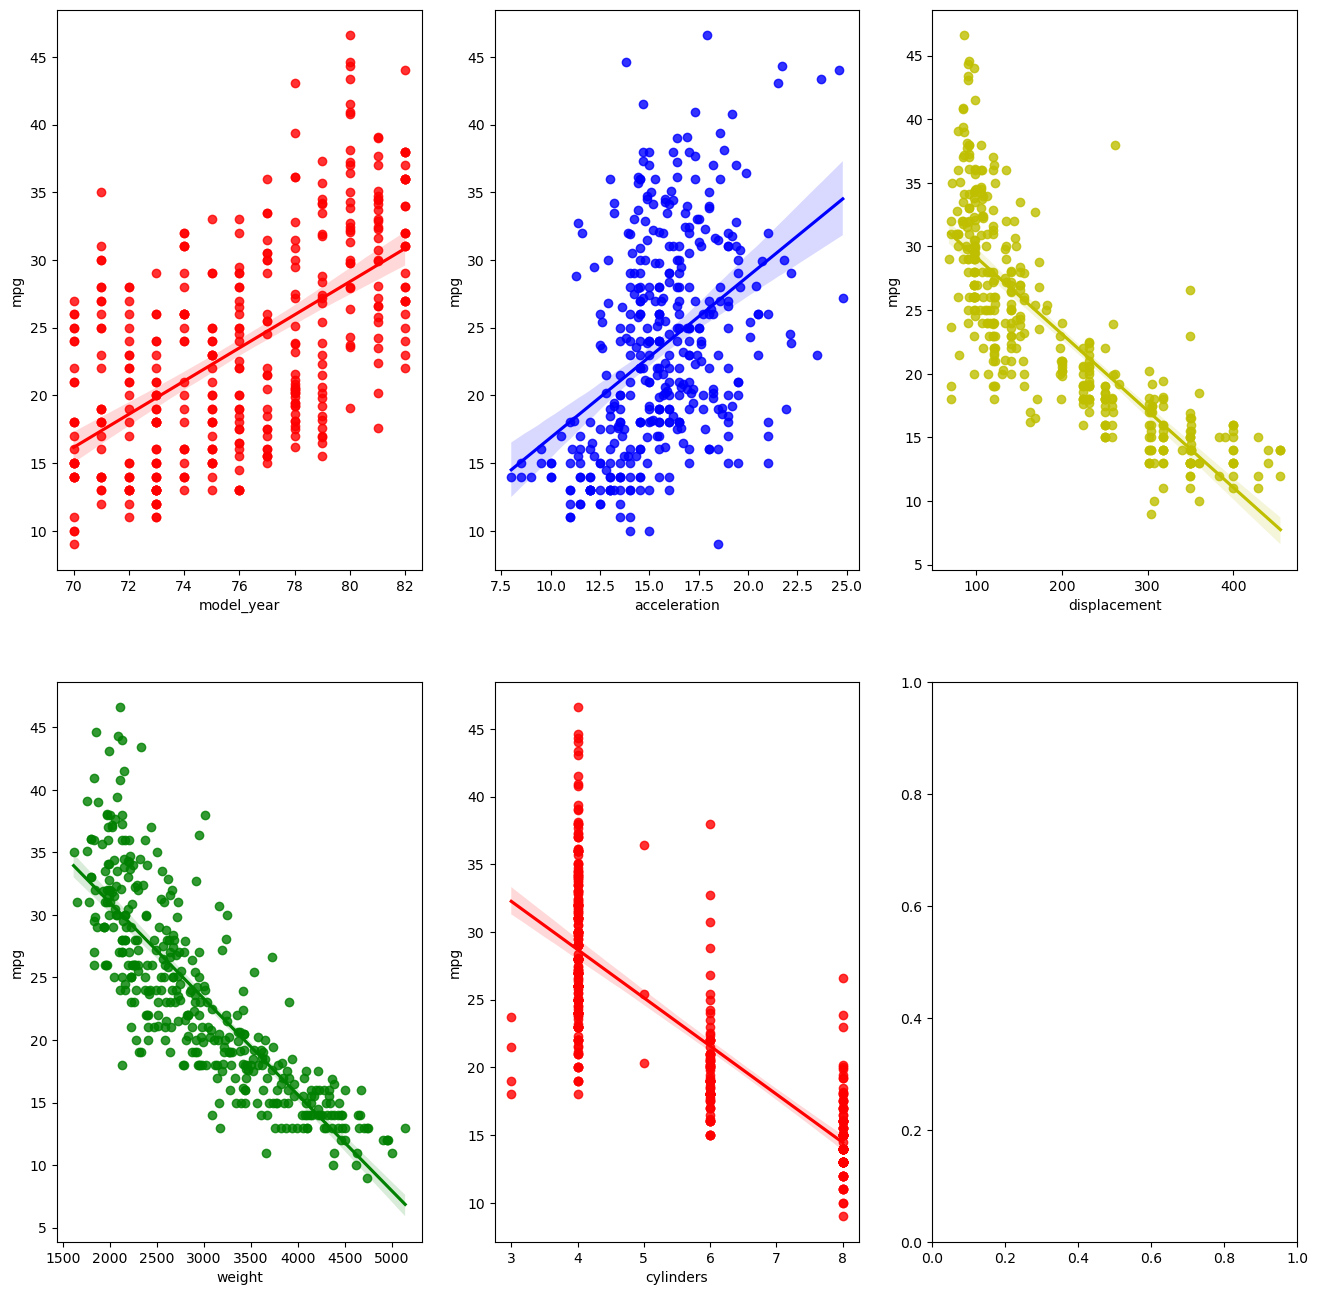

In [34]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도하고, MSE R^2 , 평가 지표 
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사. 
# 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 이미지들을 , 2 x 3 , 표 형태로 나타내기. 
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 2)

x_features = ["model_year","acceleration","displacement","weight","cylinders"]

# 그래프의 색상 옵션 
plot_color = ["r","b", "y", "g", "r"]

for i, feature in enumerate(x_features):
  # 몫 -> 2개 행으로 
  row = int(i/3)
  # 나머지 -> 0,1,2 반복
  col = i % 3
  sns.regplot(x = feature, y="mpg", data = data_df, ax = axs[row][col], color = plot_color[i])